# Introduction

This lab demonstrates how to use the Spectral Co-Clustering algorithm to bicluster a dataset. The dataset is generated using the **make_biclusters** function, which creates a matrix of small values and implants biclusters with large values. The rows and columns are then shuffled and passed to the Spectral Co-Clustering algorithm. Rearranging the shuffled matrix to make biclusters contiguous shows how accurately the algorithm found the biclusters.

# Import necessary libraries

We need to import necessary libraries such as numpy, matplotlib, scikit-learn.

In [21]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

# Generate a dataset

We generate a dataset of shape (300, 300) with 5 biclusters and noise of 5 using **make_biclusters** function.

In [15]:
data, rows, columns = make_biclusters(shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0)

# Visualize the original dataset

We visualize the original dataset using **matshow()** function.

Text(0.5, 1.0, 'Original dataset')

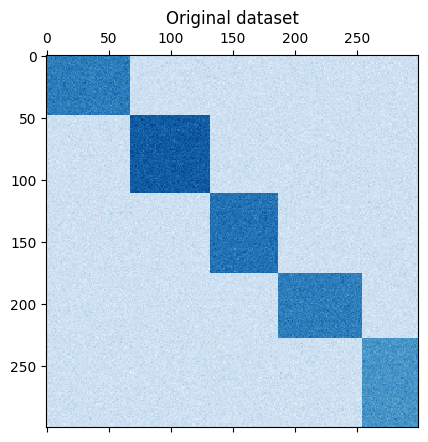

In [16]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title('Original dataset')

# Shuffle the dataset

We shuffle the dataset using **permutation()** function from numpy.

In [17]:
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

# Visualize the shuffled dataset

We visualize the shuffled dataset using **matshow()** function.

Text(0.5, 1.0, 'Shuffled dataset')

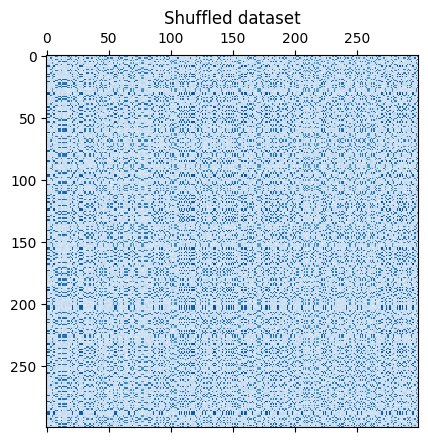

In [18]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

# Apply Spectral Co-Clustering algorithm

We apply Spectral Co-Clustering algorithm to shuffled dataset with 5 clusters.

In [22]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)

SpectralCoclustering(n_clusters=5, random_state=0)

# Calculate consensus score

We calculate the consensus score of biclusters using **consensus_score()** function.

In [23]:
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))
print("consensus score: {:.3f}".format(score))

consensus score: 1.000


# Rearrange the shuffled dataset

We rearrange the shuffled dataset to make the biclusters contiguous using **argsort()** function from numpy.

In [24]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

# Visualize the biclusters

We visualize the biclusters using **matshow()** function.

Text(0.5, 1.0, 'After biclustering; rearranged to show biclusters')

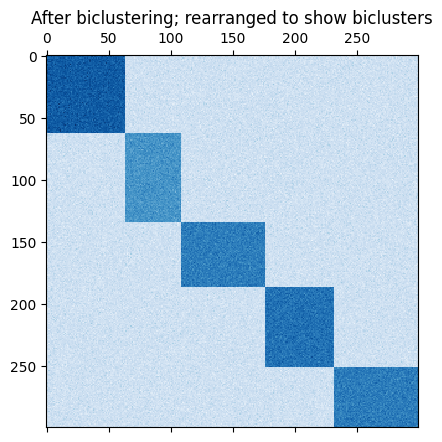

In [25]:
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

# Summary

In this lab, we learned how to generate a dataset and bicluster it using the Spectral Co-Clustering algorithm. The original dataset was generated using the **make_biclusters** function, which created a matrix of small values and implanted biclusters with large values. We shuffled the rows and columns of the dataset and passed it to the Spectral Co-Clustering algorithm. We calculated the consensus score of the biclusters and rearranged the shuffled dataset to make the biclusters contiguous. Finally, we visualized the biclusters to show how accurately the algorithm found them.